# **Task 1**

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Data loading
time = pd.read_csv('time.csv')
X = pd.read_csv('X.csv')        # Inculding x1 and x2
y = pd.read_csv('y.csv')
data = pd.concat([time, X, y], axis=1)
print(data.head())
# To gain an initial understanding of the data structure, the first five rows were inspected

   time        x1  x2          y
0   0.1 -1.383423   0  10.677616
1   0.2  0.491178   0  18.885513
2   0.3 -0.528827   0  11.246081
3   0.4 -0.359455   0   9.364583
4   0.5  0.173340   0  13.434298


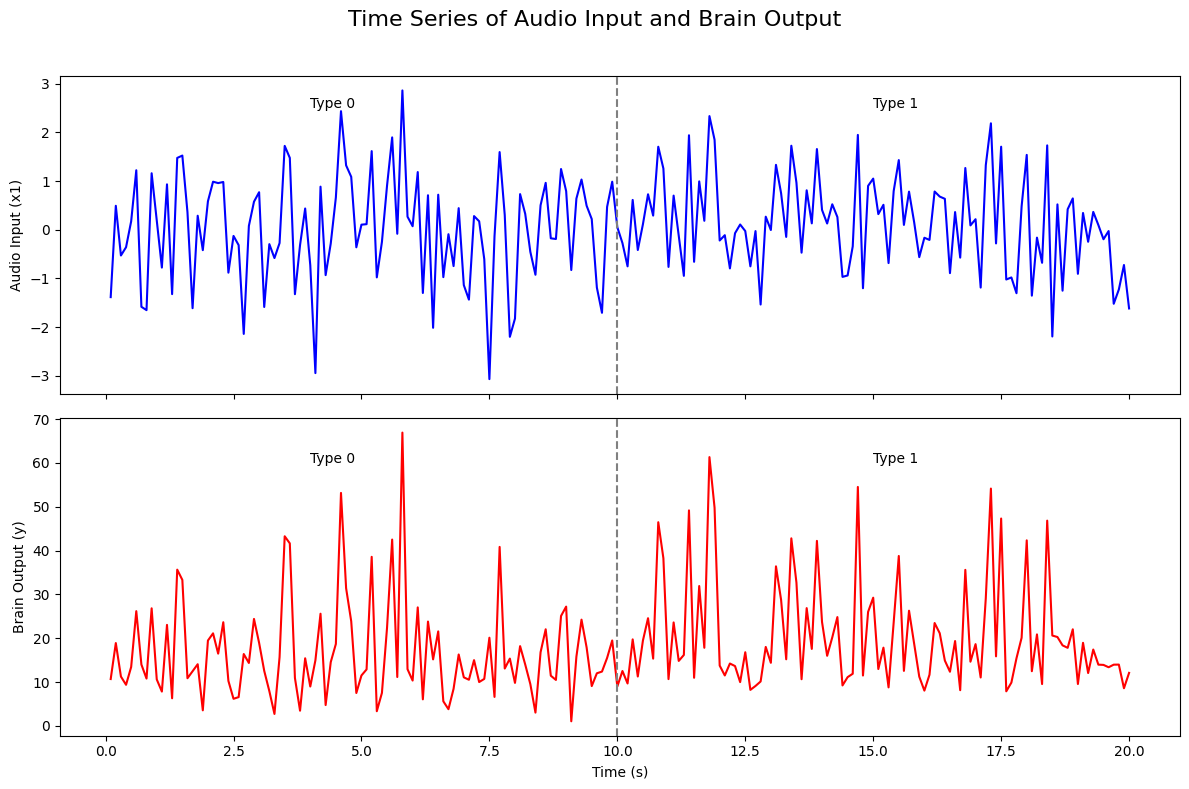

In [18]:
# The available data variables：data['time'], data['x1'], data['y'], data['x2']

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Top: Audio Input x1
axes[0].plot(data['time'], data['x1'], color='blue')
axes[0].axvline(x=10, linestyle='--', color='gray')
axes[0].text(4, 2.5, 'Type 0', fontsize=10)
axes[0].text(15, 2.5, 'Type 1', fontsize=10)
axes[0].set_ylabel('Audio Input (x1)')

# Bottom: Brain Signal Output y
axes[1].plot(data['time'], data['y'], color='red')
axes[1].axvline(x=10, linestyle='--', color='gray')
axes[1].text(4, 60, 'Type 0', fontsize=10)
axes[1].text(15, 60, 'Type 1', fontsize=10)
axes[1].set_ylabel('Brain Output (y)')
axes[1].set_xlabel('Time (s)')

plt.suptitle('Time Series of Audio Input and Brain Output', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

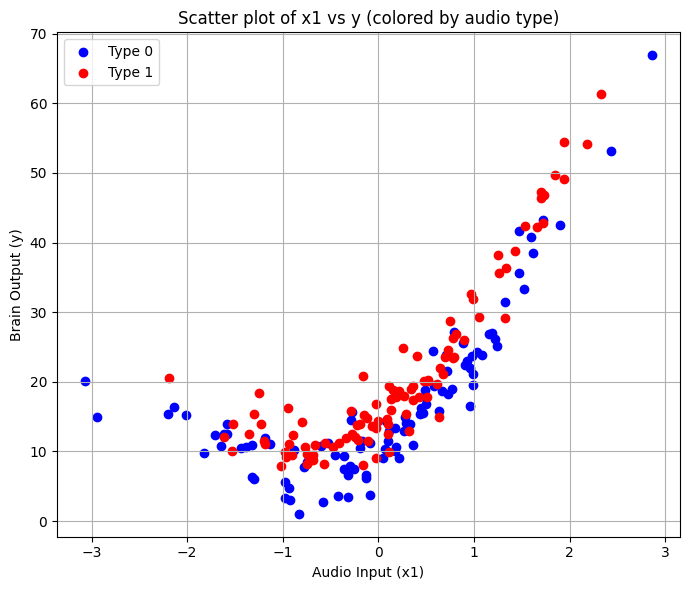

In [19]:
# Construct a Boolean mask
type0 = data['x2'] == 0
type1 = data['x2'] == 1

# Visualization
plt.figure(figsize=(7, 6))
plt.scatter(data['x1'][type0], data['y'][type0], color='blue', label='Type 0')
plt.scatter(data['x1'][type1], data['y'][type1], color='red', label='Type 1')
plt.xlabel("Audio Input (x1)")
plt.ylabel("Brain Output (y)")
plt.title("Scatter plot of x1 vs y (colored by audio type)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

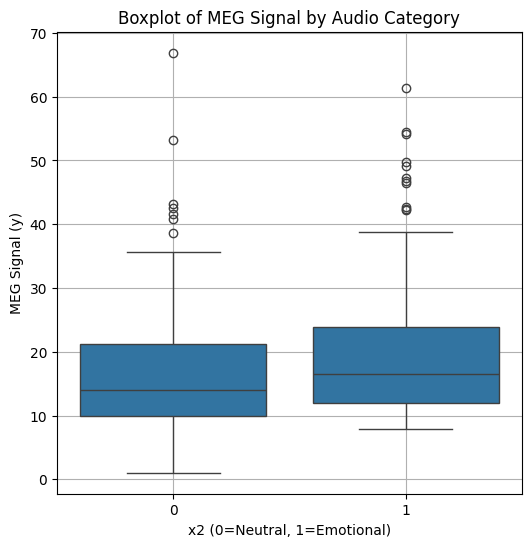

In [20]:
# Boxplot stratified by sound type
plt.figure(figsize=(6, 6))
sns.boxplot(x='x2', y='y', data=data)
plt.title('Boxplot of MEG Signal by Audio Category')
plt.xlabel('x2 (0=Neutral, 1=Emotional)')
plt.ylabel('MEG Signal (y)')
plt.grid(True)
plt.show()

# **Task 2**

In [21]:
# Five candidate polynomial regression models were constructed and evaluated

# Data loading
df_x = pd.read_csv("X.csv", header=None)
df_y = pd.read_csv("y.csv", header=None)
df_t = pd.read_csv("time.csv", header=None)

# Join
df_x.columns = ["x1", "x2"]
df_y.columns = ["y"]
df_t.columns = ["time"]
df = pd.concat([df_t, df_x, df_y], axis=1)

# Convert to float to avoid type errors
df["x1"] = pd.to_numeric(df["x1"], errors="coerce")
df["x2"] = pd.to_numeric(df["x2"], errors="coerce")
df["y"]  = pd.to_numeric(df["y"], errors="coerce")

# Construct new variables
df["x1_sq"] = df["x1"] ** 2
df["x1x2"] = df["x1"] * df["x2"]


# Define five equations
formula_M1 = "y ~ I(x1**3) + I(x1**5) + x2"
formula_M2 = "y ~ x1 + x2"
formula_M3 = "y ~ x1 + I(x1**2) + I(x1**4) + x2"
formula_M4 = "y ~ x1 + I(x1**2) + I(x1**3) + I(x1**5) + x2"
formula_M5 = "y ~ x1 + I(x1**3) + I(x1**4) + x2"

# Fitting
model_M1 = smf.ols(formula=formula_M1, data=df).fit()
model_M2 = smf.ols(formula=formula_M2, data=df).fit()
model_M3 = smf.ols(formula=formula_M3, data=df).fit()
model_M4 = smf.ols(formula=formula_M4, data=df).fit()
model_M5 = smf.ols(formula=formula_M5, data=df).fit()

# The model summary displays the estimated coefficients, p-values, R², and additional statistical metrics.
print("\n===== M1 Regression Results =====")
print(model_M1.summary())
print("\n===== M2 Regression Results =====")
print(model_M2.summary())
print("\n===== M3 Regression Results =====")
print(model_M3.summary())
print("\n===== M4 Regression Results =====")
print(model_M4.summary())
print("\n===== M5 Regression Results =====")
print(model_M5.summary())

# Obtain the RSS (Residual Sum of Squares)
def get_rss(fitted_model):
    return np.sum(fitted_model.resid ** 2)

rss_M1 = get_rss(model_M1)
rss_M2 = get_rss(model_M2)
rss_M3 = get_rss(model_M3)
rss_M4 = get_rss(model_M4)
rss_M5 = get_rss(model_M5)

# AIC and BIC can be directly accessed from the model's attributes
# Display the model comparison results
print("\nModel Comparison：")
print(f"M1: RSS={rss_M1:.2f}, AIC={model_M1.aic:.2f}, BIC={model_M1.bic:.2f}, LogLik={model_M1.llf:.2f}")
print(f"M2: RSS={rss_M2:.2f}, AIC={model_M2.aic:.2f}, BIC={model_M2.bic:.2f}, LogLik={model_M2.llf:.2f}")
print(f"M3: RSS={rss_M3:.2f}, AIC={model_M3.aic:.2f}, BIC={model_M3.bic:.2f}, LogLik={model_M3.llf:.2f}")
print(f"M4: RSS={rss_M4:.2f}, AIC={model_M4.aic:.2f}, BIC={model_M4.bic:.2f}, LogLik={model_M4.llf:.2f}")
print(f"M5: RSS={rss_M5:.2f}, AIC={model_M5.aic:.2f}, BIC={model_M5.bic:.2f}, LogLik={model_M5.llf:.2f}")


===== M1 Regression Results =====
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     89.83
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           1.32e-36
Time:                        12:05:13   Log-Likelihood:                -691.76
No. Observations:                 200   AIC:                             1392.
Df Residuals:                     196   BIC:                             1405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.

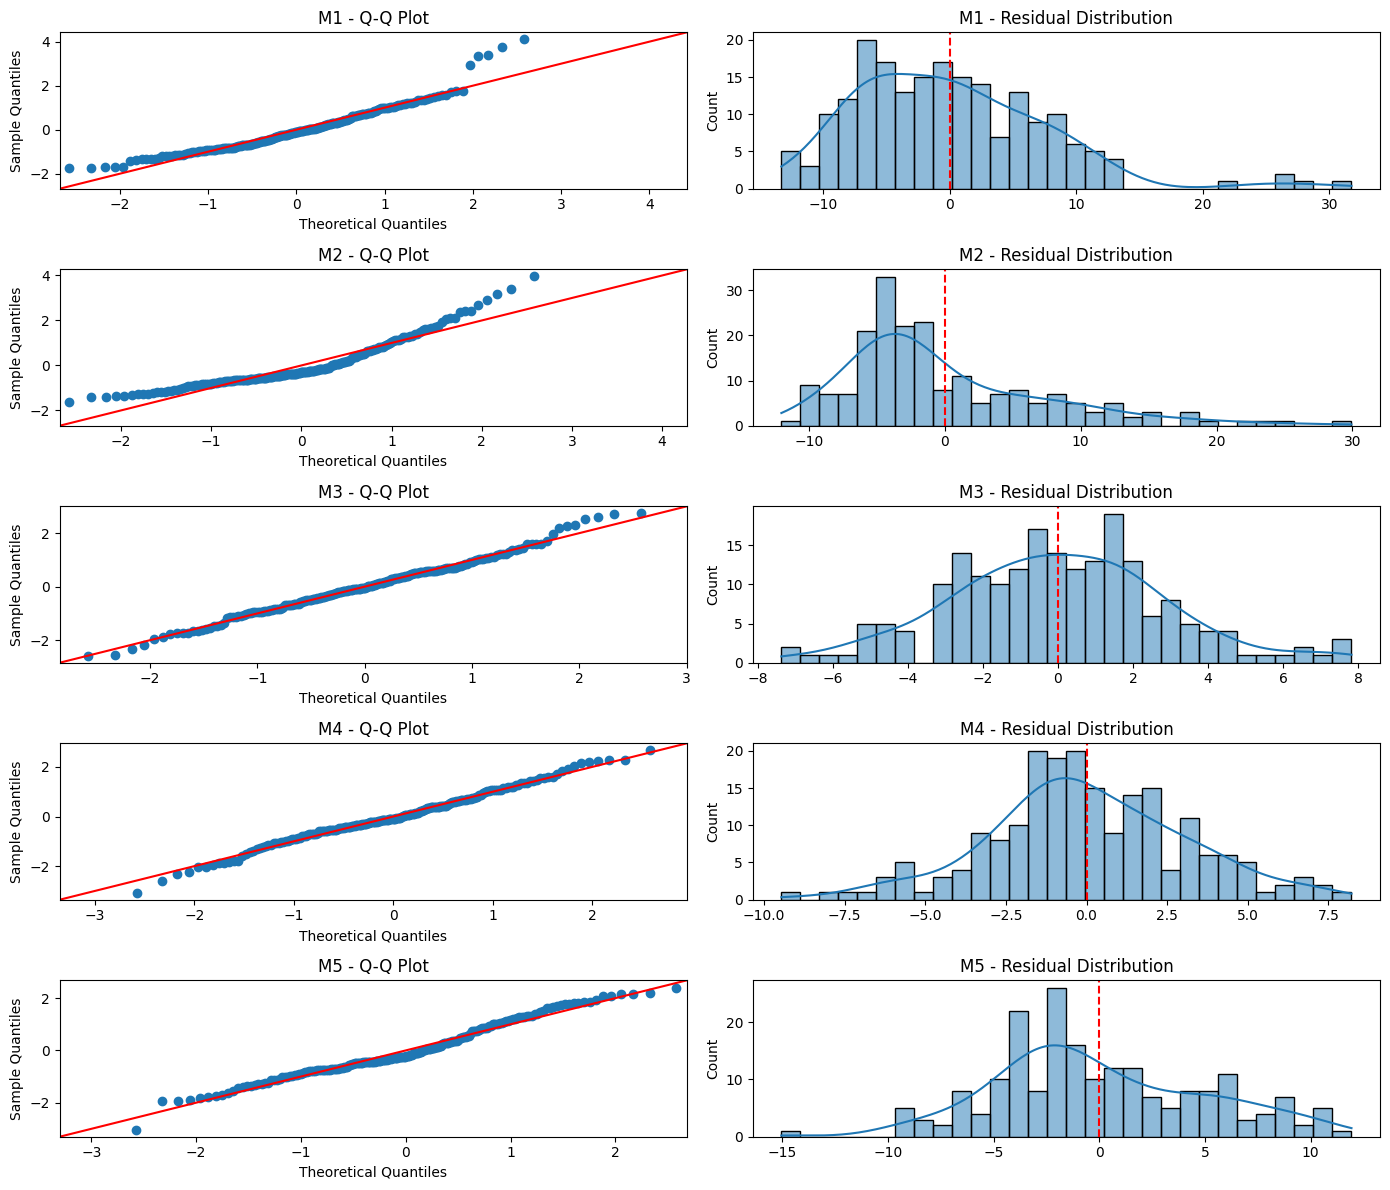

In [22]:
models = {
    "M1": model_M1,
    "M2": model_M2,
    "M3": model_M3,
    "M4": model_M4,
    "M5": model_M5,
}

# Set the figure size
plt.figure(figsize=(14, 12))

# Q-Q plot (standardized residuals)
for i, (name, model) in enumerate(models.items(), start=1):
    plt.subplot(5, 2, 2 * i - 1)
    sm.qqplot(model.resid, line='45', fit=True, ax=plt.gca())
    plt.title(f"{name} - Q-Q Plot")

# Residual distribution plot (histogram with kernel density estimate)
for i, (name, model) in enumerate(models.items(), start=1):
    plt.subplot(5, 2, 2 * i)
    sns.histplot(model.resid, kde=True, bins=30, ax=plt.gca())
    plt.axvline(x=0, color='r', linestyle='--')
    plt.title(f"{name} - Residual Distribution")

plt.tight_layout()
plt.show()

 Fitting results of model M3 on the training set：
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     575.0
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           2.75e-83
Time:                        12:05:15   Log-Likelihood:                -343.04
No. Observations:                 139   AIC:                             696.1
Df Residuals:                     134   BIC:                             710.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

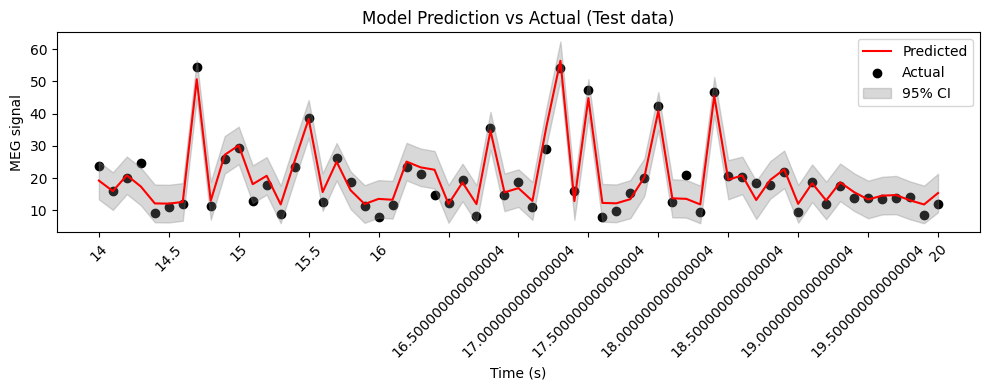

In [23]:
df["x1_sq"] = df["x1"] ** 2
df["x1x2"] = df["x1"] * df["x2"]

# 1. spliting the training and testing Set
n_total = len(df)
train_size = int(0.7 * n_total)

df_train = df.iloc[:train_size].copy()
df_test = df.iloc[train_size:].copy()

# 2. Fit model M3 on the training set
model_M5_train = smf.ols("y ~ x1 + I(x1**2) + I(x1**4) + x2", data=df_train).fit()

print(" Fitting results of model M3 on the training set：")
print(model_M5_train.summary())

# 3. Prediction on the test set
y_true = df_test["y"].values
y_pred = model_M5_train.predict(df_test)

# 4. valuation Metrics
ss_res = np.sum((y_true - y_pred) ** 2)
ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
r2_test = 1 - ss_res / ss_tot
mse_test = np.mean((y_true - y_pred) ** 2)

print(f"\n Test Set R² = {r2_test:.4f}")
print(f" Test Set MSE = {mse_test:.4f}")

# 5. Obtain the 95% confidence interval
pred_res = model_M5_train.get_prediction(df_test)
pred_summary = pred_res.summary_frame(alpha=0.05)

# 6. Figure plotting
plt.figure(figsize=(10, 4))

# Predicted values (red line)
plt.plot(df_test["time"], y_pred, 'r-', label='Predicted')

# Observed values (black dots)
plt.scatter(df_test["time"], y_true, color='black', label='Actual')

# 95% confidence interval (gray shaded area)
plt.fill_between(df_test["time"],
                 pred_summary["obs_ci_lower"],
                 pred_summary["obs_ci_upper"],
                 color='gray', alpha=0.3, label='95% CI')

# Annotation
plt.xlabel("Time (s)")
plt.ylabel("MEG signal")
plt.title("Model Prediction vs Actual (Test data)")
plt.legend()

# Prevent overlapping of time labels
xticks_spacing = 5  # Display a time tick every 5 samples
xtick_locations = df_test["time"].values[::xticks_spacing]
plt.xticks(xtick_locations, rotation=45)

# Compact layout
plt.tight_layout()

# Save the figure
# plt.savefig("model_prediction_test.png", dpi=300)

plt.show()

# **Task 3**

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.973
Date:                Sun, 30 Mar 2025   Prob (F-statistic):              0.100
Time:                        12:05:15   Log-Likelihood:                -770.74
No. Observations:                 199   AIC:                             1551.
Df Residuals:                     194   BIC:                             1568.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.6441      1.471     10.635      0.0

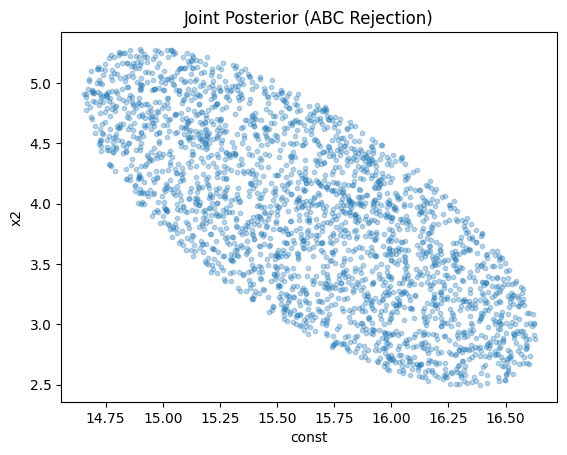

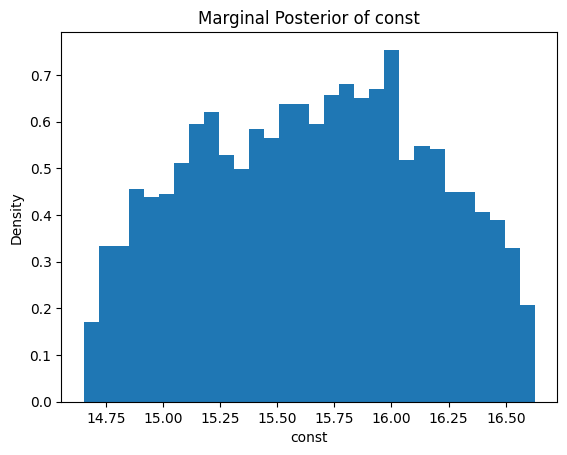

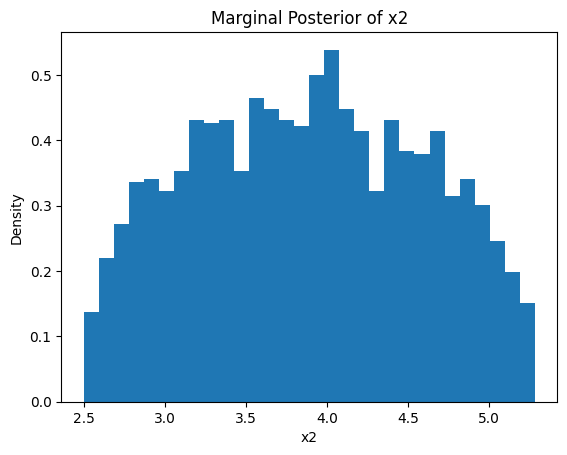

In [24]:
# 1. Read the data and ensure it is of numeric type
X_raw = pd.read_csv('X.csv')
y_raw = pd.read_csv('y.csv', header=None)

# Convert all columns to float type
X_num = X_raw.apply(pd.to_numeric, errors='coerce')
y_num = y_raw.apply(pd.to_numeric, errors='coerce')

# After merging, dropna() was applied to ensure alignment between X and y
df_merged = pd.concat([X_num, y_num], axis=1)
df_merged.dropna(inplace=True)

# Split back into X and y
X_clean = df_merged.iloc[:, :-1]
y_clean = df_merged.iloc[:, -1]

# 2. Construct the required polynomial terms and fit the regression model
X_clean['x1_2'] = X_clean['x1']**2
X_clean['x1_4'] = X_clean['x1']**4

# Add an intercept column
X_ols = sm.add_constant(X_clean[['x1','x1_2','x1_4','x2']])

# Fit the model using OLS, y ~ 1 + x1 + x1^2 + x1^4 + x2
model_ols = sm.OLS(y_clean, X_ols).fit()
print(model_ols.summary())

# 3. Identify the two coefficients with the largest absolute values and fix the remaining parameters
all_params = model_ols.params
abs_params = all_params.abs()
top2 = abs_params.nlargest(2)                # The two terms with the largest absolute values
param1_name, param2_name = top2.index
print("The two coefficients with the largest absolute values are, respectively：", param1_name, param2_name)

# Store the OLS estimates as a dictionary for later use in fixing the remaining parameters
param_dict_ols = all_params.to_dict()

# 4. Assign uniform prior distributions to the two parameters and perform sampling
param1_est = all_params[param1_name]
param2_est = all_params[param2_name]

# OLS estimate ± 50%, which can be adjusted as needed
range_factor = 0.5
p1_min = param1_est - abs(param1_est)*range_factor
p1_max = param1_est + abs(param1_est)*range_factor
p2_min = param2_est - abs(param2_est)*range_factor
p2_max = param2_est + abs(param2_est)*range_factor

# Total number of draws
N = 50000
p1_draws = np.random.uniform(p1_min, p1_max, size=N)
p2_draws = np.random.uniform(p2_min, p2_max, size=N)

# 5. Compute the SSE and use rejection sampling to retain samples with the smallest distances
def compute_sse(p1, p2, fixed_params, X_design, y_data):
    # Copy and update the two parameters to be sampled
    temp_params = fixed_params.copy()
    temp_params[param1_name] = p1
    temp_params[param2_name] = p2

    # Extract parameter values in the order of X_design.columns, and then compute y_pred
    beta_vec = np.array([temp_params[col] for col in X_design.columns])
    y_pred = X_design.values @ beta_vec

    return np.sum((y_pred - y_data)**2)

SSE_samples = np.empty(N)
for i in range(N):
    SSE_samples[i] = compute_sse(
        p1_draws[i], p2_draws[i], param_dict_ols, X_ols, y_clean
    )

# Retain the lowest 5% of SSE values
quantile_level = 0.05
epsilon = np.quantile(SSE_samples, quantile_level)
accepted_idx = (SSE_samples <= epsilon)

accepted_params = np.column_stack([p1_draws[accepted_idx], p2_draws[accepted_idx]])
n_accepted = accepted_params.shape[0]
print(f"A total of {N} samples were drawn，among them {n_accepted} samples were retained，the acceptance rate is ~ {n_accepted/N:.2%}。")

# 6. Plot: Joint Posterior and Two Marginal Posteriors
plt.figure()
plt.scatter(accepted_params[:,0], accepted_params[:,1], alpha=0.3, s=10)
plt.xlabel(param1_name)
plt.ylabel(param2_name)
plt.title('Joint Posterior (ABC Rejection)')

plt.figure()
plt.hist(accepted_params[:,0], bins=30, density=True)
plt.xlabel(param1_name)
plt.ylabel('Density')
plt.title(f'Marginal Posterior of {param1_name}')

plt.figure()
plt.hist(accepted_params[:,1], bins=30, density=True)
plt.xlabel(param2_name)
plt.ylabel('Density')
plt.title(f'Marginal Posterior of {param2_name}')

plt.show()